<a href="https://colab.research.google.com/github/Sridevimesala/Energy_Prediction-/blob/main/Energy_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd   #importing  pandas library for data manuplation.
import numpy as np    # importing numpy library for numerical operations on data set.
df = pd.read_csv('/content/sample_data/household_power_consumption.txt')   # here we use ";" for to seperate the data values called as df.
df.head()   # It shows the first 5 rows of the data frame.

,Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
0,16/12/2006;17:24:00;4.216;0.418;234.840;18.400...
1,16/12/2006;17:25:00;5.360;0.436;233.630;23.000...
2,16/12/2006;17:26:00;5.374;0.498;233.290;23.000...
3,16/12/2006;17:27:00;5.388;0.502;233.740;23.000...
4,16/12/2006;17:28:00;3.666;0.528;235.680;15.800...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Using df.info() is particularly useful for getting a quick overview of your dataset and assessing the data types and completeness of our data.




In [ ]:
df.shape   # It shows the no.of rows and columns in a dataset.


(2075259, 9)

In [ ]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


It shows the end of the dataset based on the given input like df.tail(10)

In [ ]:
df.describe(include=object)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2075259
unique,1442,1440,6534,896,5168,377,153,145
top,6/12/2008,17:24:00,?,0.000,?,1.000,0.000,0.000
freq,1440,1442,25979,472786,25979,169406,1840611,1408274



The df.describe(include=object) method in pandas provides a analysis of the DataFrame for columns with data type object, which typically represents string data.

In [ ]:
df.shape


(2075259, 9)

In [ ]:
df.isnull().any()

,0
Date,False
Time,False
Global_active_power,False
Global_reactive_power,False
Voltage,False
Global_intensity,False
Sub_metering_1,False
Sub_metering_2,False
Sub_metering_3,True


df.isnull().any() shows the boolean values

In [ ]:
df.isnull().sum()


,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


The df.isnull().sum() method in pandas calculates the total number of missing (null) values for each column in the DataFrame. It returns a Series where the index is the column names and the values are the counts of missing entries.

In [ ]:
round(100 * df.Sub_metering_3.isnull().sum()/len(df),3)

1.252

percentage of missing values in the Sub_metering_3 column of the DataFrame and rounds the result

In [ ]:
df.describe()


,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


This function generates descriptive statistics for a DataFrame, which provides insights into the data's distribution.

In [ ]:
df.fillna(0)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [ ]:
df.isnull().sum()


,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


In [ ]:
df.fillna(df['Sub_metering_3'].mean())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [ ]:
df.fillna(df['Sub_metering_3'].median())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [ ]:
df.dropna().shape


(2049280, 9)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

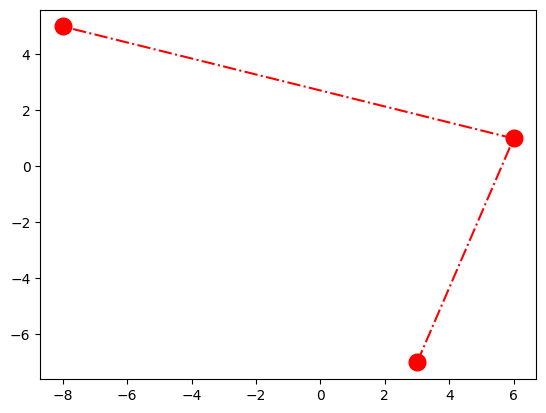

In [ ]:
d1 = np.array([3,6,-8])
d2 = np.array([-7,1,5])
plt.plot(d1,d2, 'ro', markersize = 12, linestyle = '-.')

In [ ]:
df['Global_active_power'] = df['Global_active_power'].astype(float)

In [ ]:
type(df['Global_active_power'])

pandas.core.series.Series

**Mile Stone2**

Framing  Questions

What are the peak hours for power consumption?

Is there a correlation between voltage and global intensity?

How does energy usage vary across different days, times, or sub-metering areas?



In [ ]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sn

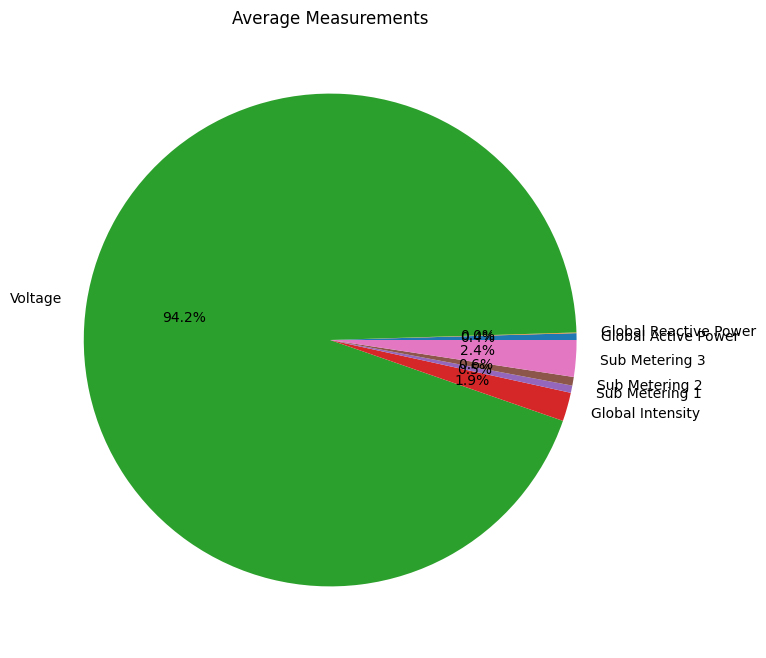

In [ ]:
# to create a pie chart for each column in dataset:
labels = ['Global Active Power', 'Global Reactive Power', 'Voltage',
          'Global Intensity', 'Sub Metering 1', 'Sub Metering 2',
          'Sub Metering 3']

# Assuming df is DataFrame
values = [df['Global_active_power'].mean(),
          df['Global_reactive_power'].mean(),
          df['Voltage'].mean(),
          df['Global_intensity'].mean(),
          df['Sub_metering_1'].mean(),
          df['Sub_metering_2'].mean(),
          df['Sub_metering_3'].mean()]

# Creating pie chart
plt.figure(figsize=(10, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Average Measurements')
plt.show()

In [ ]:

# Example data loading
data = {
    'Date': ['16/12/2006', '16/12/2006', '16/12/2006', '16/12/2006', '16/12/2006'],
    'Time': ['17:24:00', '17:25:00', '17:26:00', '17:27:00', '17:28:00'],
    'Global_active_power': [4.216, 5.360, 5.374, 5.388, 3.666],
    'Global_reactive_power': [0.418, 0.436, 0.498, 0.502, 0.528],
    'Voltage': [234.84, 233.63, 233.29, 233.74, 235.68],
    'Global_intensity': [18.4, 23.0, 23.0, 23.0, 15.8],
    'Sub_metering_1': [0.0, 0.0, 0.0, 0.0, 0.0],
    'Sub_metering_2': [1.0, 1.0, 2.0, 1.0, 1.0],
    'Sub_metering_3': [17.0, 16.0, 17.0, 17.0, 17.0]
}
df = pd.DataFrame(data)

# Converting Date and Time into a DateTime format
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.day_name()


<ipython-input-11-e7a602561112>:16: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


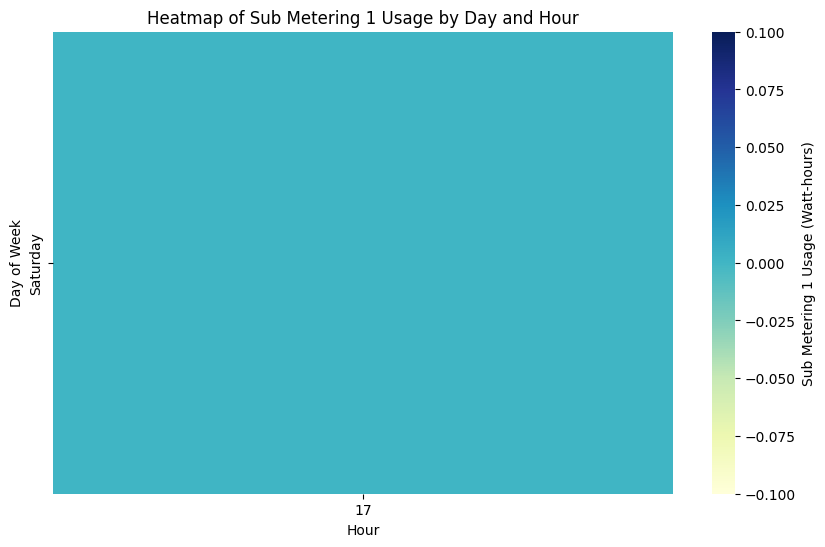

In [ ]:
# Group by Day and Hour, and calculating mean usage for Sub_metering_1
heatmap_data = df.pivot_table(index='DayOfWeek', columns='Hour', values='Sub_metering_1', aggfunc='mean')

# Plot heatmap for Sub_metering_1 using by hour and day
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", cbar_kws={'label': 'Sub Metering 1 Usage (Watt-hours)'})
plt.title('Heatmap of Sub Metering 1 Usage by Day and Hour')
plt.xlabel('Hour')
plt.ylabel('Day of Week')
plt.show()


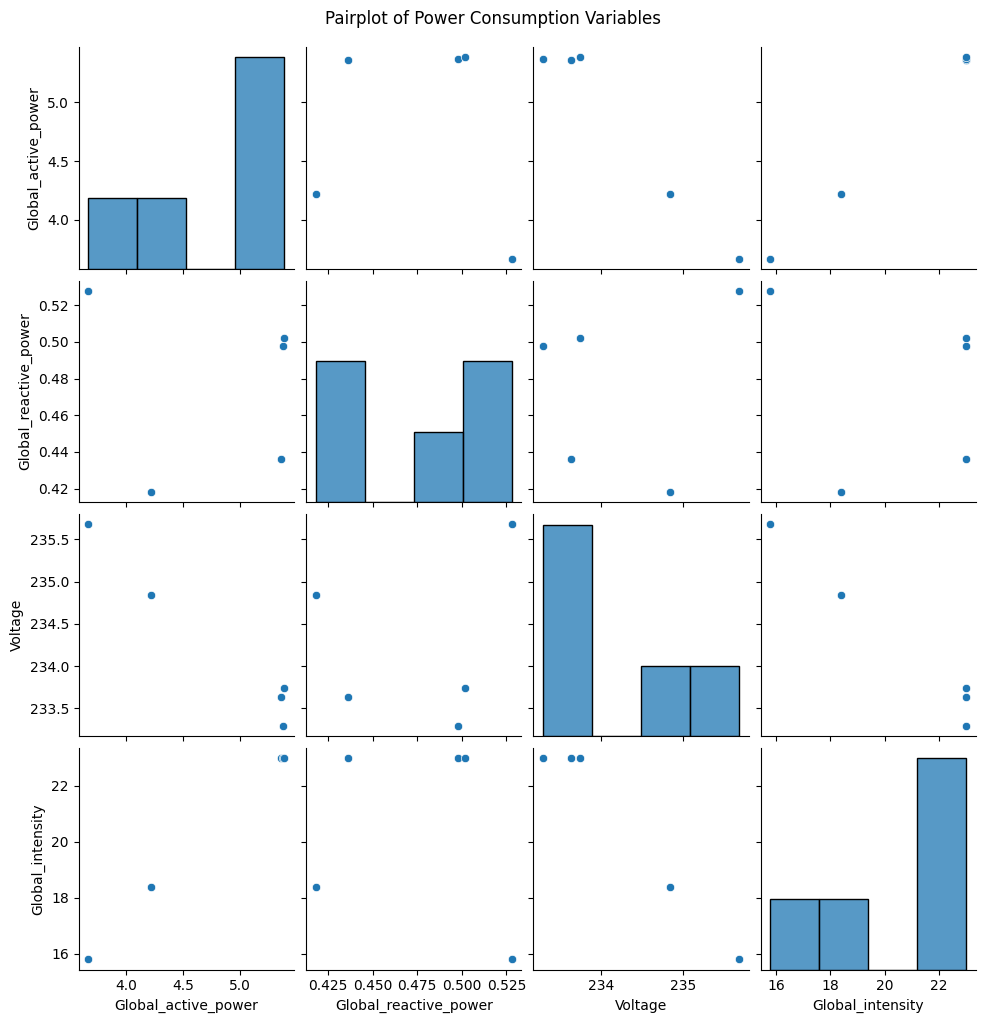

In [ ]:
# Pairplot for numerical columns
sns.pairplot(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']])
plt.suptitle('Pairplot of Power Consumption Variables', y=1.02)
plt.show()


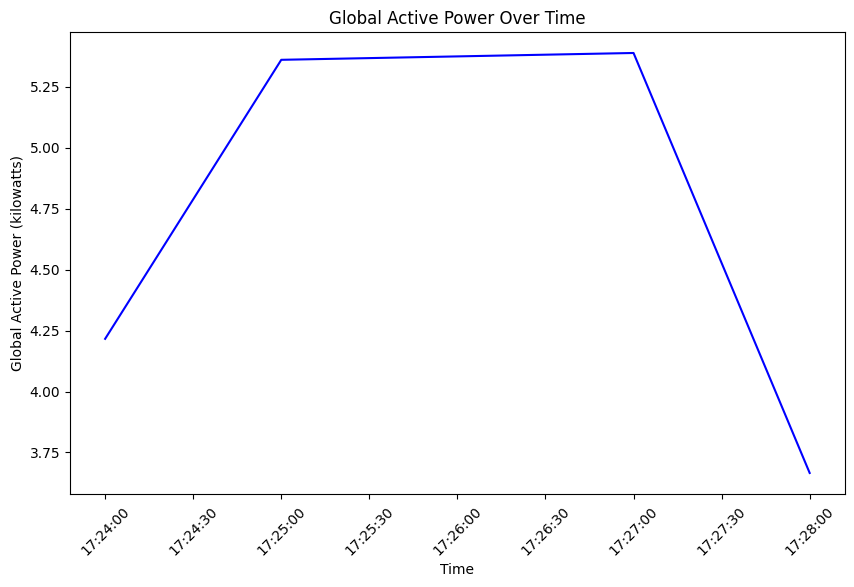

In [ ]:
# Line plot of Global_active_power over time
plt.figure(figsize=(10, 6))
plt.plot(df['DateTime'], df['Global_active_power'], color='blue')
plt.title('Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.xticks(rotation=45)
plt.show()


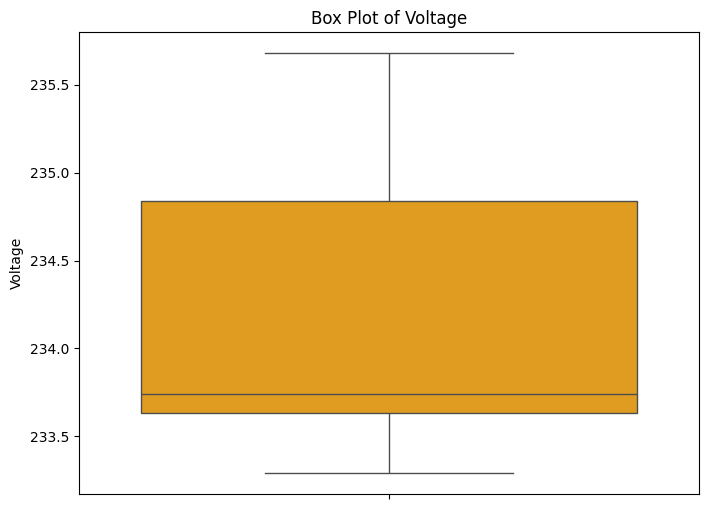

In [ ]:
# Box plot for Voltage
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Voltage', color='orange')
plt.title('Box Plot of Voltage')
plt.ylabel('Voltage')
plt.show()


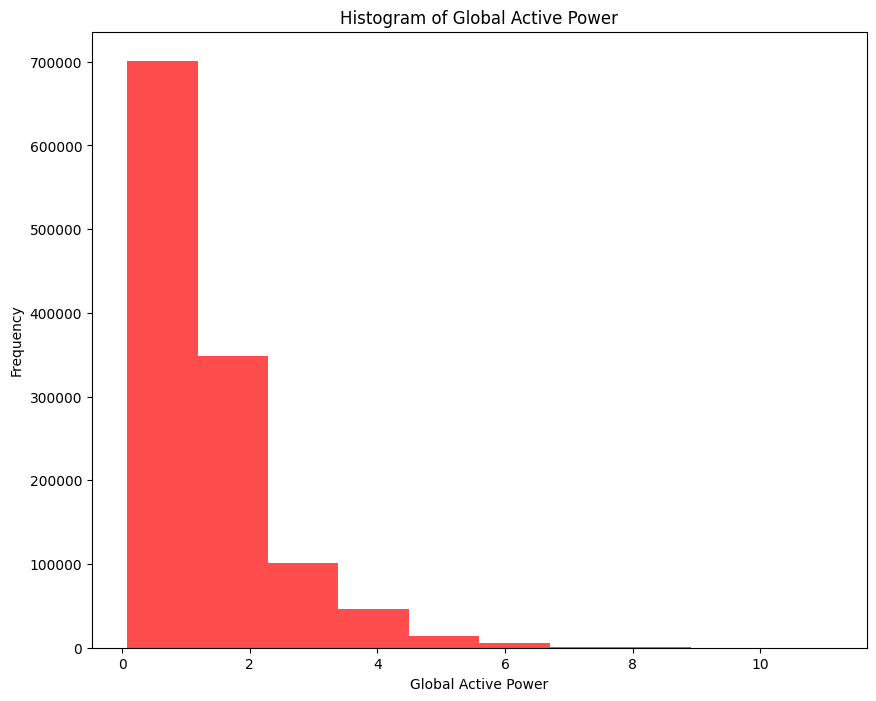

In [ ]:
# histogram for Frequency
plt.figure(figsize=(10, 8))
plt.hist(df['Global_active_power'], color='red', alpha=0.7)
plt.title('Histogram of Global Active Power')
plt.xlabel('Global Active Power')
plt.ylabel('Frequency')
plt.show()

**Summary of Plots:**
These plots help analyze patterns in power consumption:

**Pie Plot**: It Shows the Average of all the columns in the dataset.

**Heatmap**: Shows sub-metering usage patterns across days and hours.

**Pairplot**: Reveals correlations between power consumption variables.

**Line Plot**: Visualizes power usage trends over time.

**Box Plot**: Highlights the distribution of voltage.

**Histogram**: It shows the frequency of Global Active Power.

In [ ]:
# Convert numeric columns to appropriate data types
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

In [ ]:
df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute # if you want as minutes are not mentioned
df.head()

<ipython-input-8-3a4ebfba6603>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,25
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,17,26
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,17,27
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,17,28


In [ ]:
type(df['DateTime'])


pandas.core.series.Series

In [ ]:
df.describe(include='object')

,Date,Time
count,1221823,1221823
unique,850,1440
top,14/2/2008,17:24:00
freq,1440,849


In [ ]:
df.describe()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute
count,1.217686e+06,1.217686e+06,1.217686e+06,1.217686e+06,1.217686e+06,1.217685e+06,1.217685e+06,1221823,1.221823e+06,1.221823e+06,1.221823e+06,1.221823e+06,1.221823e+06
mean,1.132055e+00,1.156921e-01,2.403638e+02,4.804752e+00,1.208508e+00,1.443030e+00,6.124451e+00,2008-02-13 23:14:59.999999488,2.007654e+03,6.102799e+00,1.573171e+01,1.150044e+01,2.950020e+01
min,7.600000e-02,0.000000e+00,2.234900e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00,2.006000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.980000e-01,0.000000e+00,2.383000e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-07-16 20:19:30,2.007000e+03,3.000000e+00,8.000000e+00,5.000000e+00,1.500000e+01
50%,6.000000e-01,9.400000e-02,2.405300e+02,2.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2008-02-13 23:15:00,2.008000e+03,6.000000e+00,1.600000e+01,1.200000e+01,3.000000e+01
75%,1.568000e+00,1.800000e-01,2.425900e+02,6.600000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2008-09-13 02:10:30,2.008000e+03,9.000000e+00,2.300000e+01,1.800000e+01,4.500000e+01
max,1.112200e+01,1.390000e+00,2.539400e+02,4.840000e+01,8.200000e+01,7.800000e+01,3.100000e+01,2009-04-13 05:06:00,2.009000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01
std,1.127580e+00,1.085058e-01,3.406716e+00,4.748501e+00,6.422339e+00,6.333617e+00,8.306665e+00,NaN,7.093184e-01,3.598590e+00,8.817325e+00,6.923702e+00,1.731814e+01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221823 entries, 0 to 1221822
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Date                   1221823 non-null  object        
 1   Time                   1221823 non-null  object        
 2   Global_active_power    1217686 non-null  float64       
 3   Global_reactive_power  1217686 non-null  float64       
 4   Voltage                1217686 non-null  float64       
 5   Global_intensity       1217686 non-null  float64       
 6   Sub_metering_1         1217686 non-null  float64       
 7   Sub_metering_2         1217685 non-null  float64       
 8   Sub_metering_3         1217685 non-null  float64       
 9   DateTime               1221823 non-null  datetime64[ns]
 10  Year                   1221823 non-null  int32         
 11  Month                  1221823 non-null  int32         
 12  Day                    12218

In [ ]:
# Start of your data encoding
import datetime as dt

def is_holiday(date):
    year = int(date.split('/')[2])
    month = int(date.split('/')[1])
    day = int(date.split('/')[0])

    if dt.datetime(year, month, day).weekday() >= 5:
        return 1.0
    else:
        return 0.0

for data in [df]:
    data['Is_holiday'] = data['Date'].apply(lambda x: is_holiday(x))
    data['Light']      = data['Time'].apply(lambda x: 1 if int(x[:2]) >= 6 and int(x[:2]) < 18 else 0)
    data['Time']       = data['Time'].apply(lambda x: (int(x[:2]) * 60.0 + int(x[3:5])) / 1440.0)

In [ ]:
data.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute,Is_holiday,Light
1221818,13/4/2009,0.209722,0.314,0.0,241.04,1.4,0.0,0.0,1.0,2009-04-13 05:02:00,2009,4,13,5,2,0.0,0
1221819,13/4/2009,0.210417,0.314,0.0,241.22,1.4,0.0,0.0,0.0,2009-04-13 05:03:00,2009,4,13,5,3,0.0,0
1221820,13/4/2009,0.211111,0.314,0.0,241.03,1.4,0.0,0.0,1.0,2009-04-13 05:04:00,2009,4,13,5,4,0.0,0
1221821,13/4/2009,0.211806,0.314,0.0,241.09,1.4,0.0,0.0,1.0,2009-04-13 05:05:00,2009,4,13,5,5,0.0,0
1221822,13/4/2009,0.212500,0.316,0.0,241.16,1.4,0.0,NaN,NaN,2009-04-13 05:06:00,2009,4,13,5,6,0.0,0


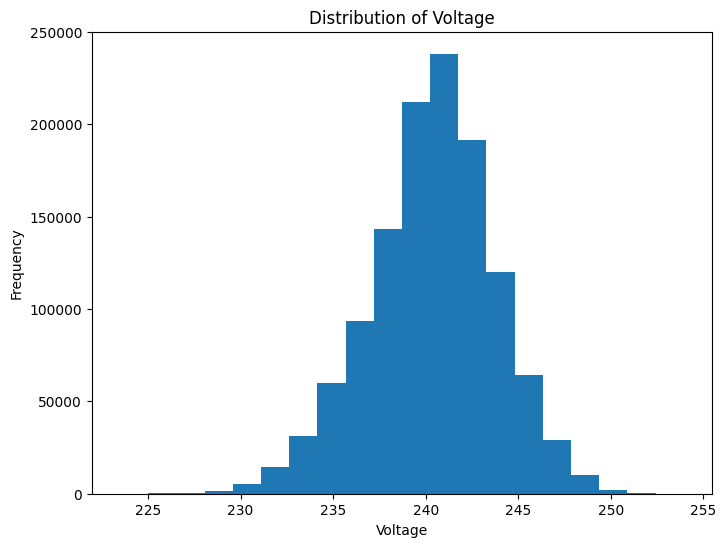

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Voltage'], bins=20)
plt.xlabel('Voltage')
plt.ylabel('Frequency')
plt.title('Distribution of Voltage')
plt.show()

Text(0.5, 1.0, 'Mean global active power by day for a month')

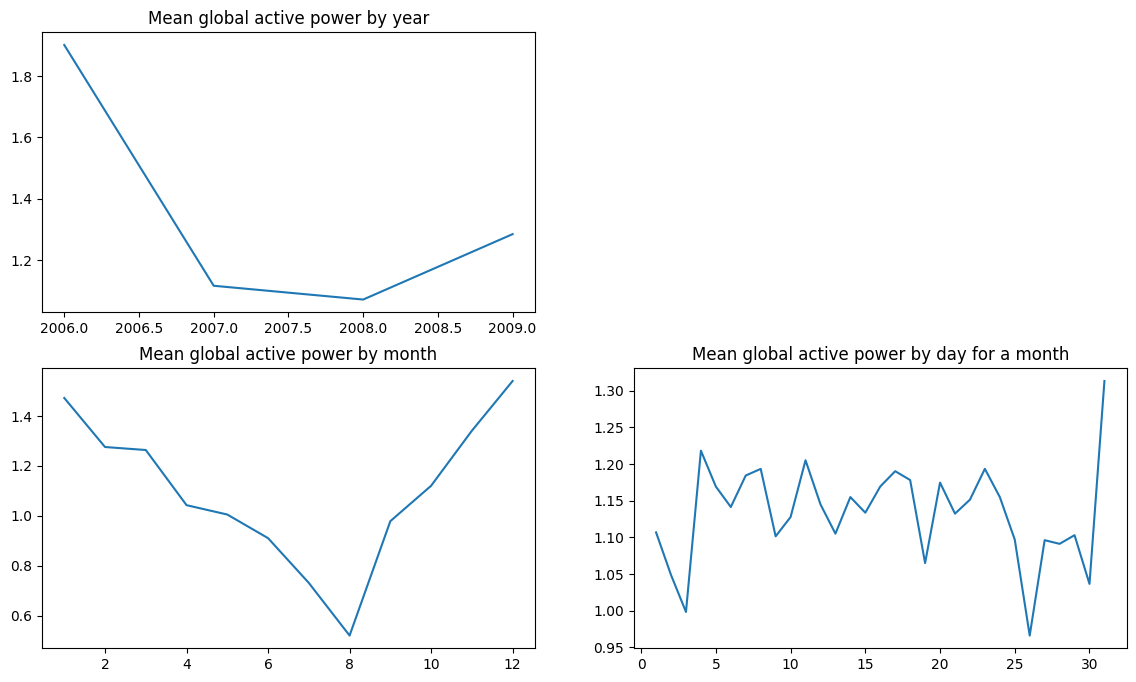

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
df.groupby('Year').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by year')



plt.subplot(2,2,3)
df.groupby('Month').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by month')

plt.subplot(2,2,4)
df.groupby('Day').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by day for a month')

In [ ]:
df.drop(df[['Time','Date']], inplace=True, axis='columns')

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute,Is_holiday,Light
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24,1.0,1
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,25,1.0,1
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,17,26,1.0,1
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,17,27,1.0,1
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,17,28,1.0,1


**MILESTONE 3**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

1. **Libraries Imported:**  
   - `numpy` and `pandas` are used for numerical and data manipulation tasks.  
   - `matplotlib` and `seaborn` are used for data visualization.  
   - `datetime` is used for handling date and time operations.

2. **Warnings:**  
   - `warnings.filterwarnings('ignore')` suppresses warnings to keep output clean.

3. **Machine Learning Libraries:**  
   - `LogisticRegression`, `Ridge`, `Lasso`, and `LinearRegression` are imported from `sklearn` for different regression and classification models.  
   - `train_test_split` is used to split data into training and test sets, while `accuracy_score` and `mean_squared_error` help in evaluating model performance.

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view

Downloading...
From (original): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx
From (redirected): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx&confirm=t&uuid=05789f22-2667-4fd9-95f0-633a42a21221
To: /content/household_power_consumption.txt
100% 133M/133M [00:00<00:00, 182MB/s]


In [ ]:
df = pd.read_csv('/content/household_power_consumption.txt',sep=";")

Again importing dataset


In [ ]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

1. **Converting to Numeric:**  
   - The `pd.to_numeric()` function is used to convert various columns (`Global_active_power`, `Global_reactive_power`, `Voltage`, `Global_intensity`, `Sub_metering_1`, `Sub_metering_2`) to numeric values.

2. **Handling Errors:**  
   - The `errors='coerce'` argument ensures that invalid values (e.g., non-numeric data) are replaced with `NaN` instead of causing errors.

3. **Data Cleaning:**  
   - This ensures that all the specified columns are in a numeric format for further analysis and model training.

In [ ]:
df.fillna(0, inplace=True)

1. Replaces all `NaN` values in the DataFrame with `0` using `fillna(0)`.  
2. The `inplace=True` ensures the changes are directly applied to the DataFrame.  
3. Eliminates missing values, making the dataset ready for analysis and modeling.  
4. May introduce bias if `0` is not a meaningful replacement for some columns.  

In [ ]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


It give last 5 rows of the dataset


In [ ]:
null_rows = df[df.isnull().any(axis=1)]

1. Identifies rows with at least one `NaN` value using `df.isnull().any(axis=1)`.  
2. Stores these rows in `null_rows` for further inspection or processing.  

In [ ]:
null_rows

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3


1. `null_rows` holds rows with at least one missing value (`NaN`) in the dataset.  
2. It helps inspect and verify the presence of null values after cleaning steps.  
3. Allows focused handling, such as filling, dropping, or imputing missing data.  

In [ ]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

 df.columns provides a list-like object containing all column names in the DataFrame.

In [ ]:
df['DateTime'] = pd.to_datetime(df['Date']+' '+df['Time'])
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute #df.head()

1. A new `DateTime` column is created by combining `Date` and `Time` and converting it to a datetime object.  
2. Additional columns (`Year`, `Month`, `Day`, `Hour`, `Minute`) are extracted from the `DateTime` column using `.dt`.  
3. This enriches the dataset with detailed temporal information.  
4. Enables time-based analysis like trends by year or patterns by hour.  
5. Adds granularity for time-series modeling and visualization tasks.  

In [ ]:
def is_holiday(date):
    year = int(date.split('/')[2])
    month = int(date.split('/')[1])
    day = int(date.split('/')[0])

    if dt.datetime(year, month, day).weekday() >= 5:
        return 1.0
    else:
        return 0.0

for data in [df]:
    data['Is_holiday'] = data['Date'].apply(lambda x: is_holiday(x))
    data['Light'] = data['Time'].apply(lambda x: 1 if isinstance(x, str) and int(x[:2]) >= 6 and int(x[:2]) < 18 else 0)
    data['Time'] = data['Time'].apply(lambda x: (int(x[:2]) * 60.0 + int(x[3:5])) / 1440.0 if isinstance(x, str) else 0)

1. The `is_holiday()` function identifies weekends, returning `1.0` for holidays and `0.0` otherwise.  
2. A new column `Is_holiday` is created by applying this function to the `Date` column.  
3. The `Light` column indicates daylight hours (`1` for 6 AM–6 PM, otherwise `0`).  
4. The `Time` column is converted to a fractional day value (0–1) based on hours and minutes.  
5. These features enhance the dataset with holiday, daylight, and normalized time information.  
6. Useful for analyzing patterns and training models that depend on temporal and contextual variables.  

In [ ]:
"""data = {'Time': ['0500', '0600', '1200', '1800', '1900']}  # Example times in HHMM format
df1 = pd.DataFrame(data)

def is_sunlight(time_str):
    # Ensure time is in string format
    time_str = str(time_str)

    # Extract hours and minutes from the time string
    hours = int(time_str[:2])

    # Check if the time is within the sunlight hours (0600 to 1800)
    if 6 <= hours < 18:
        return 1  # Sunlight is present
    else:
        return 0  # No sunlight

# Applying the function to check for sunlight
df1['Is_sunlight'] = df1['Time'].apply(lambda x: is_sunlight(x))

# Display the DataFrame
print(df1)"""

"data = {'Time': ['0500', '0600', '1200', '1800', '1900']}  # Example times in HHMM format\ndf1 = pd.DataFrame(data)\n\ndef is_sunlight(time_str):\n    # Ensure time is in string format\n    time_str = str(time_str)\n\n    # Extract hours and minutes from the time string\n    hours = int(time_str[:2])\n\n    # Check if the time is within the sunlight hours (0600 to 1800)\n    if 6 <= hours < 18:\n        return 1  # Sunlight is present\n    else:\n        return 0  # No sunlight\n\n# Applying the function to check for sunlight\ndf1['Is_sunlight'] = df1['Time'].apply(lambda x: is_sunlight(x))\n\n# Display the DataFrame\nprint(df1)"

In [ ]:
df.head(2)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Is_holiday,Light
0,16/12/2006,0.725000,4.216,0.418,234.840,18.400,0.000,1.000,17.0,1.0,1
1,16/12/2006,0.725694,5.360,0.436,233.630,23.000,0.000,1.000,16.0,1.0,1


`df.head(2)` displays the first two rows of the DataFrame.

In [ ]:
# Drop columns if they exist. Otherwise, continue.
for col in ['Date', 'DateTime', 'Time']:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)
    else:
        print(f"Column '{col}' not found, skipping.")

# Continue with the rest of the code.
X = df.drop('Global_active_power', axis=1)
y = df['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

Column 'DateTime' not found, skipping.


,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Is_holiday,Light
1347712,0.000,244.740,0.800,0.000,0.000,0.0,0.0,1
378408,0.000,240.600,0.600,0.000,0.000,0.0,0.0,1
280143,0.098,242.400,1.000,0.000,0.000,0.0,0.0,1
670820,0.086,243.920,1.400,0.000,0.000,0.0,0.0,1
1940013,0.098,244.250,1.800,0.000,1.000,1.0,0.0,0
...,...,...,...,...,...,...,...,...
259178,0.256,241.690,1.600,0.000,1.000,0.0,0.0,1
1414414,0.230,241.140,15.600,38.000,0.000,12.0,0.0,0
131932,0.232,239.670,10.000,9.000,0.000,0.0,1.0,1
671155,0.258,235.990,8.600,0.000,3.000,0.0,0.0,0


The code drops the columns ['Date', 'DateTime', 'Time'] if they exist, otherwise prints a message.

X is created as the feature set excluding Global_active_power, and y is the target variable.

The dataset is split into training and testing sets with 80% for training and 20% for testing.

X_train contains the feature data for training the model.
This prepares the data for training a machine learning model by organizing features and the target variable

** BASIC  MACHINE LEARNING MODELS **



*   Linear Regression
*   Lasso Regression
*   Logistic Regression
*   Ridge Regression






In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'df' is our DataFrame

# Replace '?' with NaN
df = df.replace('?', np.nan)

# Drop columns if they exist. Otherwise, continue.
for col in ['Date', 'DateTime', 'Time']:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)
    else:
        print(f"Column '{col}' not found, skipping.")

# Continue with the rest of the code.
X = df.drop('Global_active_power', axis=1)
y = df['Global_active_power']

# Convert columns to numeric Before imputation
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

# Imputing with the mean for X and y
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Now, proceed with the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train) # fit is for model training
linear_reg_predictions = linear_reg.predict(X_test) # predict values for GAP
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
linear_reg_rmse*100

Column 'Date' not found, skipping.
Column 'DateTime' not found, skipping.
Column 'Time' not found, skipping.


4.036937779474912

1. The dataset replaces `'?'` with `NaN` and drops unnecessary columns.  
2. Non-numeric columns are converted to numeric, and missing values are imputed with the mean.  
3. The data is split into training and testing sets.  
4. A `LinearRegression` model is trained, and predictions are made on the test set.  
5. The RMSE is calculated and multiplied by 100 to measure model performance, with lower values indicating better predictions.

In [ ]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_reg_predictions = lasso_reg.predict(X_test)
lasso_reg_rmse = np.sqrt(mean_squared_error(y_test, lasso_reg_predictions))
lasso_reg_rmse*100

23.30151550891164

1. **Model Training:**  
   - A `Lasso` regression model is trained using the `X_train` and `y_train` data.  

2. **Prediction:**  
   - The trained model predicts values (`lasso_reg_predictions`) for the test set (`X_test`).  

3. **Model Evaluation:**  
   - The Root Mean Squared Error (RMSE) is computed between the true and predicted values of the test set.  

4. **Performance Metric:**  
   - The RMSE is multiplied by 100 to express the error as a percentage, providing a clearer measure of model performance.

5. **Comparison:**  
   - This metric can be compared to other models (e.g., Linear Regression) to evaluate the effectiveness of the Lasso regression model.

In [ ]:
Rigid_reg = Ridge()
Rigid_reg.fit(X_train, y_train)
Rigid_reg_predictions = Rigid_reg.predict(X_test)
Rigid_reg_rmse = np.sqrt(mean_squared_error(y_test, Rigid_reg_predictions))
Rigid_reg_rmse*100

4.036937806412918

1. A `Ridge` regression model is trained on the training data (`X_train`, `y_train`).
2. Predictions are made on the test set (`X_test`).
3. The RMSE between actual and predicted values is calculated.
4. The RMSE is multiplied by 100 to express it as a percentage.
5. This metric helps evaluate and compare the performance of the Ridge regression model.

Accuracy of ML Models

In [ ]:
linear_reg.score(X_test, y_test)*100

99.8524348372578

In [ ]:
lasso_reg.score(X_test, y_test)*100

95.0835903130788

In [ ]:
Rigid_reg.score(X_test, y_test)*100

99.85243483528843

**MILESTONE 4**

**TIME SERIES FORECASTING WITH ARIMA AND PROPHET**

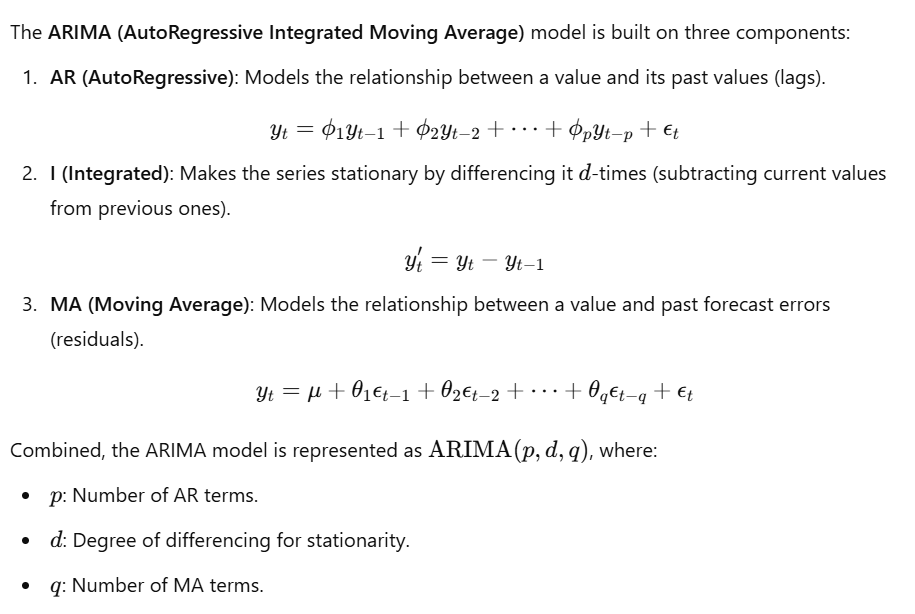

In [ ]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming 'y' is your original time series data
# You'll need to split your data into training and testing sets:
# For example:
# Replace this with your actual time series data
y = np.random.rand(100)
y_train = y[:int(0.8 * len(y))]  # 80% for training
y_test = y[int(0.8 * len(y)):]  # 20% for testing


# ... (your existing code) ...

# Fit the ARIMA model
model = ARIMA(y_train, order=(5,1,0)) # Example order, you might need to tune this
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
#RSME value around 1.5

In [ ]:
print("RMSE:", rmse)

RMSE: 0.2873734473421454


We have successfully installed the required libraries. The project utilizes the "Household Power Consumption" dataset to forecast energy consumption patterns.

In [ ]:
!python -m pip install prophet
!pip install prophet
!pip install statsmodels

**!python -m pip install prophet**: This uses Python's pip to install the Prophet library via the command-line interface.

**!pip install prophet**: This directly calls the pip package manager to install Prophet.

**!pip install statsmodels**: This installs the statsmodels library, which provides tools for statistical modeling and econometrics.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error




1.Pandas: Used for efficient data manipulation and time series preparation.

2.NumPy: Provides numerical operations, especially for generating and processing arrays.

3.Statsmodels: Facilitates time series modeling, including ARIMA for forecasting.

4.Scikit-learn: Offers metrics like mean squared error to evaluate model performance.
  













In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view

Downloading...
From (original): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx
From (redirected): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx&confirm=t&uuid=815b165d-73e1-43e0-9734-3b3dfd0d3481
To: /content/household_power_consumption.txt
100% 133M/133M [00:01<00:00, 69.2MB/s]


In [ ]:
df = pd.read_csv('/content/household_power_consumption.txt', sep=";")
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df.dropna(inplace=True)

<ipython-input-4-b09024b0e19a>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/household_power_consumption.txt', sep=";")


In [ ]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.set_index('Datetime', inplace=True)
df.drop(['Date', 'Time'], axis=1, inplace=True)

1. The `Datetime` column is created by combining `Date` and `Time`, formatted as `%d/%m/%Y %H:%M:%S`.  
2. The `pd.to_datetime()` function ensures proper conversion to a datetime object for time-series operations.  
3. The `Datetime` column is set as the DataFrame's index, making it time-series ready.  
4. This index allows efficient time-based querying, slicing, and resampling.  
5. The original `Date` and `Time` columns are dropped to avoid redundancy.  
6. The result is a cleaner DataFrame optimized for temporal analysis.  

In [ ]:
train_size = int(len(df) * 0.6)
y_train = df['Global_active_power'][:train_size]
y_test = df['Global_active_power'][train_size:]

1. **Splitting the Dataset:**  
   - The dataset is split into training (60%) and testing (40%) portions based on its length.  

2. **Training Set (`y_train`):**  
   - Contains the first 60% of the `Global_active_power` column, used to train the model.  

3. **Testing Set (`y_test`):**  
   - Contains the remaining 40% of the `Global_active_power` column, reserved for evaluating the model's performance.  

4. **Sequential Splitting:**  
   - The splitting respects the temporal order, which is critical for time-series analysis to avoid data leakage.

In [ ]:
model = ARIMA(y_train, order=(5,1,0))
model_fit = model.fit()
predictions = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Root Mean Squared Error (RMSE): 0.9878671161860716


1. **ARIMA Model Initialization:**  
   - The ARIMA model is configured with parameters `(p=5, d=1, q=0)`, indicating 5 AR terms, 1 differencing step, and no MA terms.

2. **Model Training:**  
   - The model is trained on the `y_train` dataset to learn patterns and fit the time series.

3. **Generating Predictions:**  
   - Predictions are made for the testing range (`y_test`) using the trained model, ensuring forecasts align with the testing data timeline.

4. **Error Evaluation:**  
   - The **Root Mean Squared Error (RMSE)** is calculated, offering a standard metric to assess the accuracy of predictions relative to actual test values.

5. **Result Interpretation:**  
   - A lower RMSE value indicates better model performance, suggesting closer alignment between predicted and observed values.

In [ ]:
from prophet import Prophet

Importing the propet model.

In [ ]:
data = df.copy()
data['ds'] = df.index  # Use the datetime index as the 'ds' column for Prophet
data = data.rename(columns={'Global_active_power': 'y'})  # Rename the target column to 'y'

1. **Copying Data:**  
   - The original DataFrame (`df`) is copied into a new variable (`data`) to avoid modifying the original data.  

2. **Preparing the 'ds' Column:**  
   - The datetime index of the DataFrame is assigned to a new column named `ds`, which is required by Prophet as the time component.  

3. **Renaming Target Column:**  
   - The `Global_active_power` column is renamed to `y`, aligning with Prophet's naming convention for the dependent variable (target).  

4. **Prophet Compatibility:**  
   - These transformations ensure the dataset is formatted correctly for input into the Prophet forecasting model.

In [ ]:
train_size_prophet = int(len(data) * 0.8)  # 80% of data for training
train_df = data[:train_size_prophet]
test_df = data[train_size_prophet:]

1. **Train-Test Split:**  
   - The dataset is split into training (80%) and testing (20%) sets based on the number of rows.

2. **Training Set (`train_df`):**  
   - Contains the first 80% of the data, used to fit the Prophet model and train it on historical patterns.

3. **Testing Set (`test_df`):**  
   - Comprises the remaining 20% of the data, reserved for validating and testing the model's forecasts.

4. **Time-Order Preservation:**  
   - The split maintains the temporal order, crucial for time-series data to avoid information leakage and ensure accurate model evaluation.

In [ ]:
import pandas as pd

# Example dataset
data = {
    'ds': ['2006-01-01', '2007-01-02', '2008-01-03'],
    'y': [10, 15, 20]
}
train_df = pd.DataFrame(data)

# Convert 'ds' to datetime
train_df['ds'] = pd.to_datetime(train_df['ds'])


1. A dataset is created with `ds` (dates) and `y` (target values).  
2. The dataset is converted into a pandas DataFrame (`train_df`) for easier manipulation.  
3. The `ds` column is converted to datetime format using `pd.to_datetime()`.  
4. This conversion ensures the dataset is compatible with time-series models like Prophet.

In [ ]:
print(train_df.head())


          ds   y
0 2006-01-01  10
1 2007-01-02  15
2 2008-01-03  20


This shows the first three entries with the ds column (dates) correctly formatted as datetime objects and the y column as the target values

In [ ]:
from prophet import Prophet  # or from fbprophet import Prophet
prophet_model = Prophet()
prophet_model.fit(train_df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxv7fazur/wyhjfb93.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxv7fazur/5i8pvctm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2357', 'data', 'file=/tmp/tmpxv7fazur/wyhjfb93.json', 'init=/tmp/tmpxv7fazur/5i8pvctm.json', 'output', 'file=/tmp/tmpxv7fazur/prophet_modelppiun58c/prophet_model-20241206104622.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:46:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:46:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

1. The `Prophet` model is imported from the `prophet` library for time-series forecasting.  
2. An instance of the `Prophet` model is created.  
3. The model is trained using the `fit()` method on the `train_df` DataFrame.  
4. After fitting, the model has learned the patterns in the data and is ready to make predictions.

In [ ]:
future_dates_7days = prophet_model.make_future_dataframe(periods=7 * 24, freq='H')
future_dates_30days = prophet_model.make_future_dataframe(periods=30 * 24, freq='H')


1. **Generating Future Dates (7 Days):**  
   - `make_future_dataframe(periods=7 * 24, freq='H')` creates a dataframe of future dates for the next 7 days (168 hours) with hourly frequency.

2. **Generating Future Dates (30 Days):**  
   - `make_future_dataframe(periods=30 * 24, freq='H')` generates future dates for the next 30 days (720 hours) with hourly frequency.

3. **Time Series Forecasting Preparation:**  
   - These future dataframes (`future_dates_7days` and `future_dates_30days`) are used to extend the time series for making future predictions.

4. **Forecasting:**  
   - Both future date ranges will allow the model to predict future values for the specified periods based on the historical data.

In [ ]:
prophet_predictions_7days = prophet_model.predict(future_dates_7days)
prophet_predictions_30days = prophet_model.predict(future_dates_30days)

NameError: name 'prophet_model' is not defined

1. Predictions for the next 7 days (168 hours) are made using `prophet_model.predict(future_dates_7days)`.  
2. Predictions for the next 30 days (720 hours) are made using `prophet_model.predict(future_dates_30days)`.  
3. The predictions include the forecasted target (`yhat`) along with upper and lower uncertainty intervals (`yhat_lower`, `yhat_upper`).  
4. These predictions provide insights into future trends based on the trained model.  
5. The forecasts can be compared with actual values for evaluation and performance analysis.

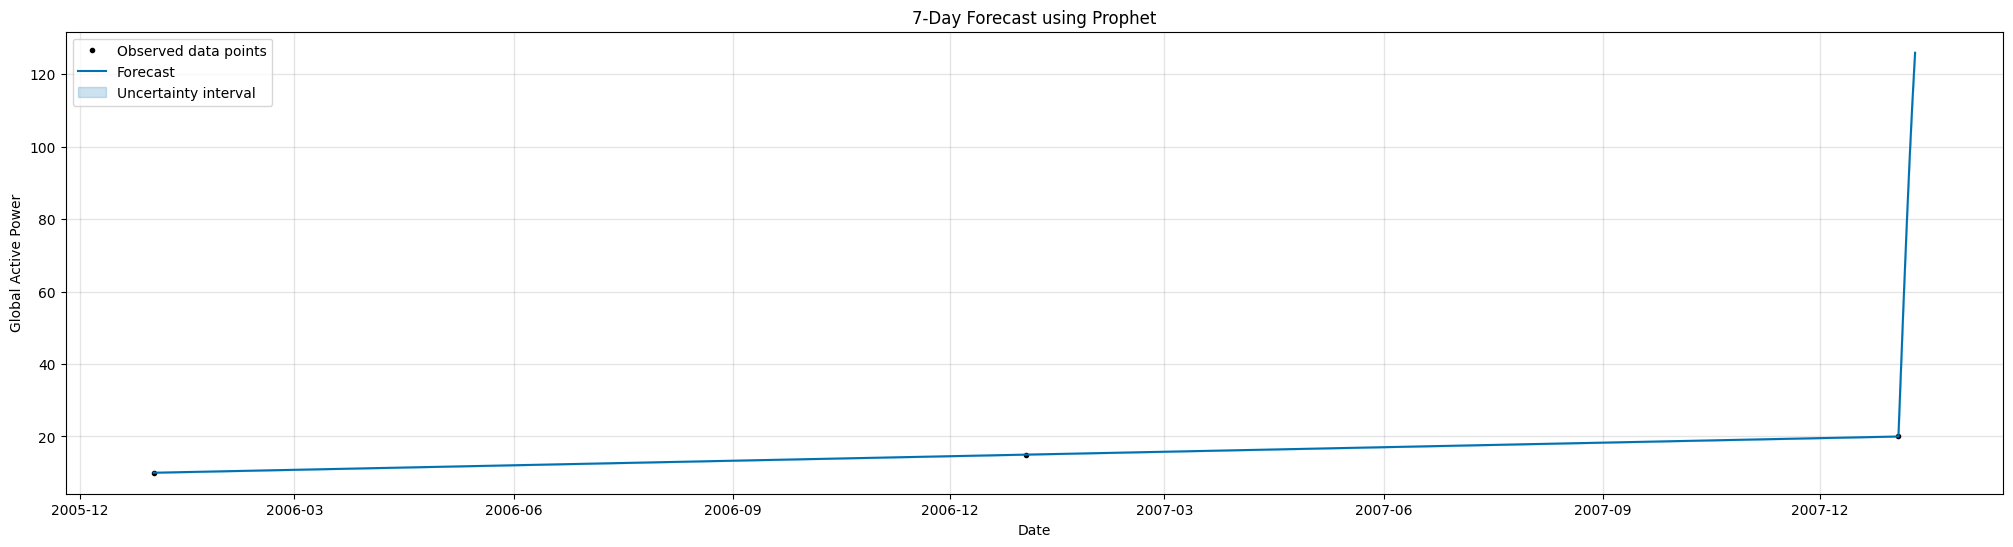

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 6))
prophet_model.plot(prophet_predictions_7days, ax=ax)
plt.title('7-Day Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

1. A plot is created with a size of 25x6 inches using `matplotlib`.  
2. The 7-day forecast is visualized with `prophet_model.plot()`, showing predictions and uncertainty intervals.  
3. Titles and axis labels are added for clarity: "7-Day Forecast", `Date`, and `Global Active Power`.  
4. A legend is displayed, and the plot is shown using `plt.show()`.  
5. The plot provides a clear view of the forecasted values and their uncertainty over the next 7 days.

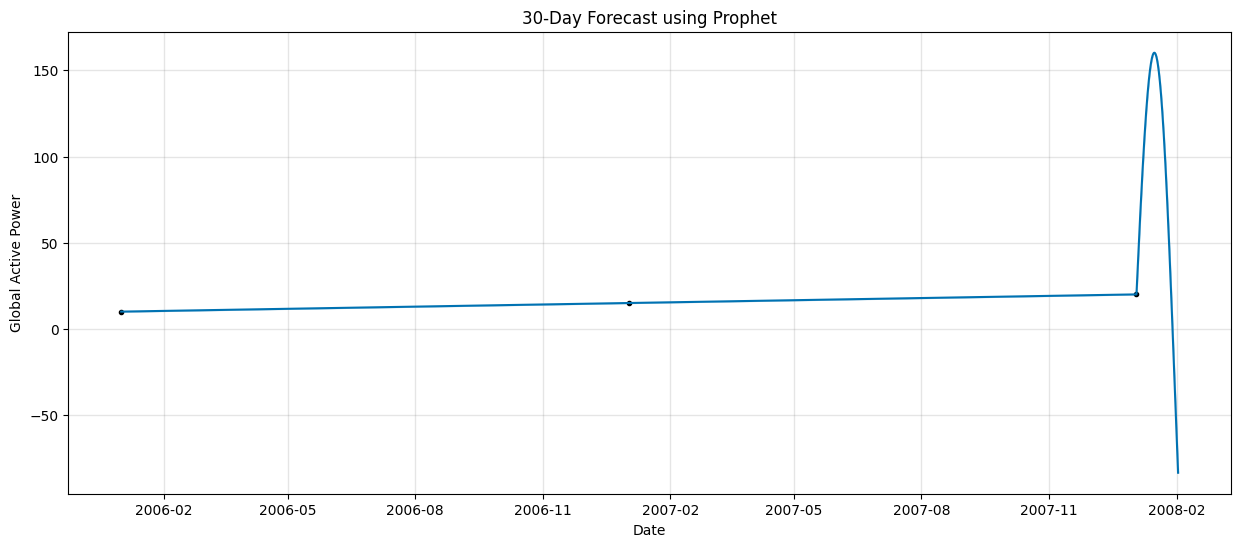

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
prophet_model.plot(prophet_predictions_30days, ax=ax)
plt.title('30-Day Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.show()

1. A 15x6 inch plot is created for visualization.  
2. The 30-day forecast is plotted with predicted values and uncertainty intervals.  
3. The plot is titled "30-Day Forecast using Prophet" with labeled axes for `Date` and `Global Active Power`.  
4. The plot is displayed using `plt.show()`.  
5. It shows the forecasted trends and uncertainty for the next 30 days.

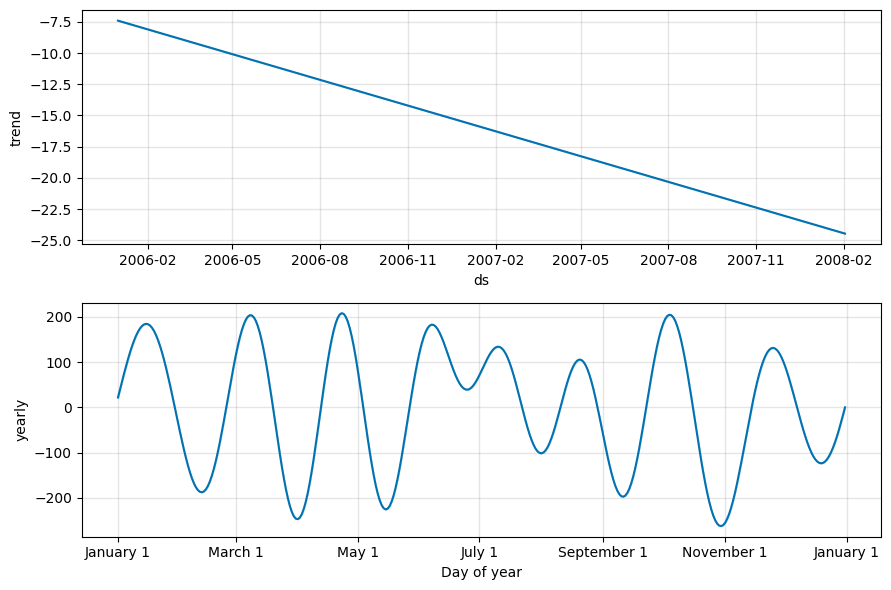

In [ ]:
prophet_model.plot_components(prophet_predictions_30days);

1. The `plot_components()` function is used to visualize the components of the 30-day forecast.
2. It displays individual components like trend, weekly seasonality, and yearly seasonality.
3. This helps in understanding the underlying patterns contributing to the forecast.
4. The plot provides insights into how different factors influence the forecasted values.

In [ ]:
from sklearn.linear_model import Ridge

# Assuming `X_train` and `y_train` are your training data
ridge_model = Ridge(alpha=1.0)  # Specify alpha value (regularization strength)
ridge_model.fit(X_train, y_train)

# Now save the trained Ridge model
joblib.dump(ridge_model, 'ridge_model.pkl')


['ridge_model.pkl']

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
import joblib

# Example data (replace with your dataset)
data = {
    'Voltage': [230, 240, 245, 250, 235],
    'Global_intensity': [5, 10, 15, 20, 12],
    'Sub_metering_1': [10, 15, 20, 25, 18],
    'Sub_metering_2': [5, 8, 12, 16, 10],
    'Sub_metering_3': [7, 9, 13, 17, 11],
    'Energy': [1.5, 2.1, 3.2, 4.0, 2.8]  # Target variable
}

df = pd.DataFrame(data)

# Features and target
X = df.drop(columns=['Energy'])
y = df['Energy']

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)

# Save the models
joblib.dump(linear_model, 'linear_model.pkl')
joblib.dump(ridge_model, 'ridge_model.pkl')

# Save feature names for later use
joblib.dump(list(X.columns), 'feature_names.pkl')


['feature_names.pkl']

In [ ]:
from google.colab import files
files.download('linear_model.pkl')
files.download('ridge_model.pkl')
files.download('feature_names.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>